# Step 1: Load and Inspect the Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('TASK-ML-INTERN.csv')

# Display basic info and first few rows
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB

First 5 Rows:
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.67

# Step 2: Check for Missing Values and Duplicates

In [3]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())



Missing Values:
hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

Duplicate Rows: 0


# Step 3: Descriptive Statistics

In [4]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.

# Step 4: Visualizing Missing Data

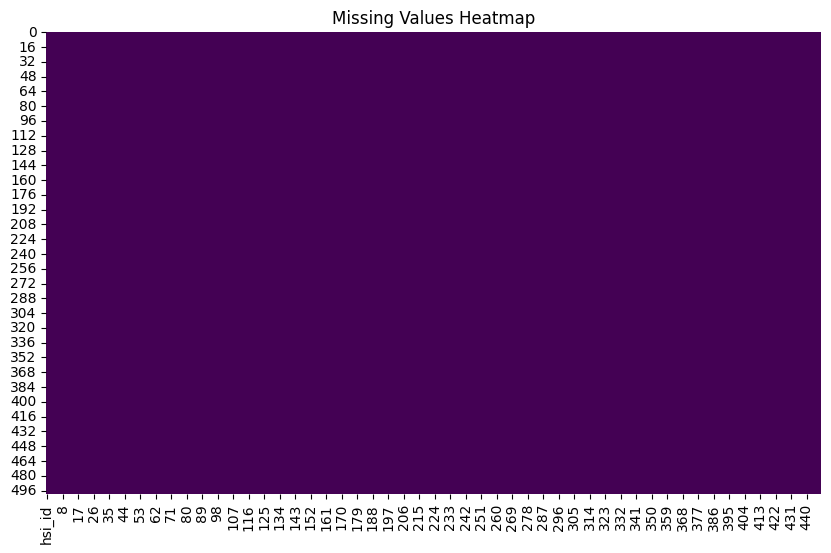

In [6]:


# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


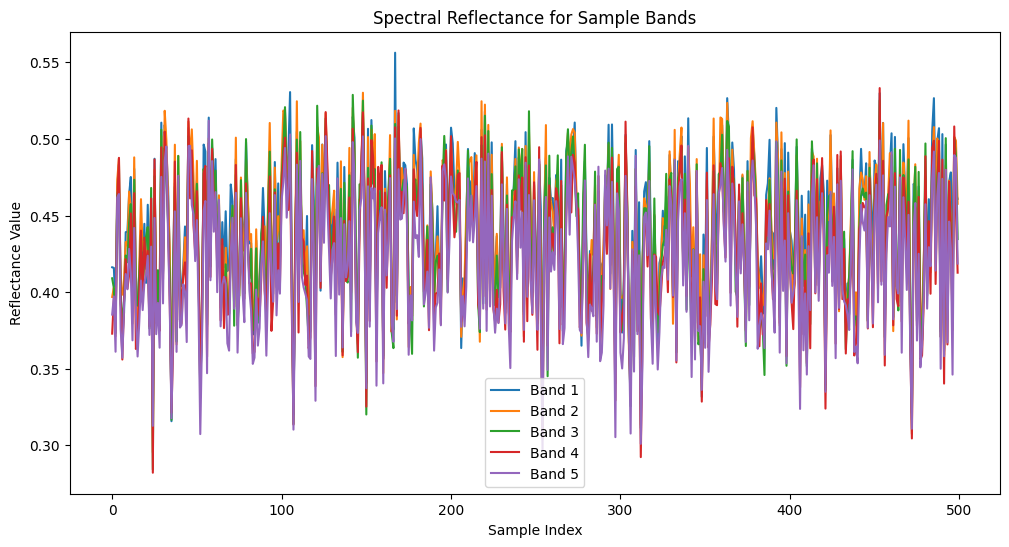

In [7]:
# Visualize spectral reflectance values
plt.figure(figsize=(12, 6))
for i in range(1, 6):  # Plot first 5 spectral bands
    plt.plot(df.iloc[:, i], label=f'Band {i}')
plt.title('Spectral Reflectance for Sample Bands')
plt.xlabel('Sample Index')
plt.ylabel('Reflectance Value')
plt.legend()
plt.show()


# Step 5: Outlier Detection

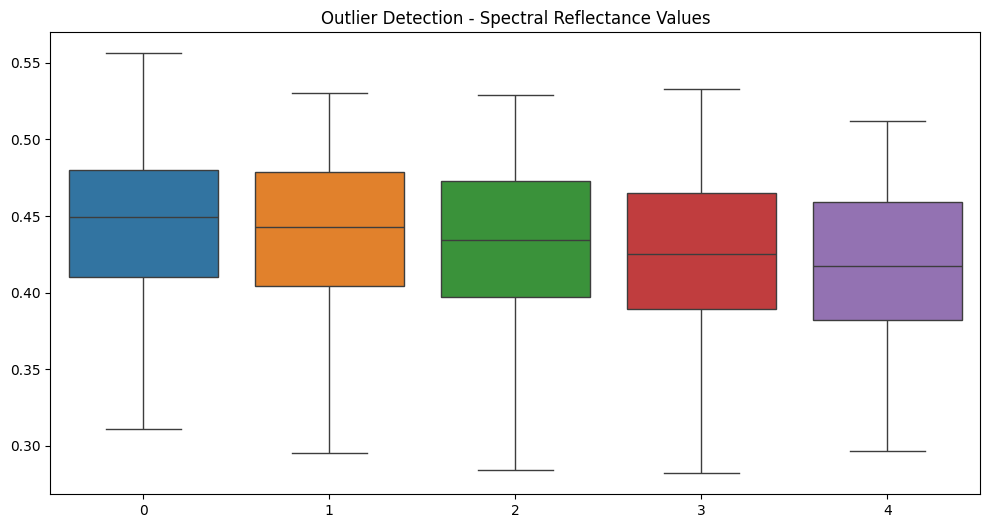

In [8]:
# Outlier detection using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:6])  # Visualizing the first 5 spectral bands
plt.title('Outlier Detection - Spectral Reflectance Values')
plt.show()


# Step 6: Handling Outliers and Data Normalization

In [10]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]


In [12]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
df_cleaned = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | 
                          (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original Data Shape: {df_numeric.shape}")
print(f"Cleaned Data Shape: {df_cleaned.shape}")


Original Data Shape: (500, 449)
Cleaned Data Shape: (388, 449)


# Step 7: Dimensionality Reduction using PCA

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

print(df_normalized.head())


          0         1         2         3         4         5         6  \
0  0.376413  0.310090  0.425999  0.251399  0.398736  0.305281  0.312942   
1  0.374702  0.343102  0.395230  0.370324  0.459555  0.428765  0.415371   
2  0.255538  0.171630  0.254036  0.256570  0.274851  0.225411  0.206015   
3  0.610772  0.722757  0.684581  0.695627  0.789142  0.786269  0.828790   
4  0.675378  0.798466  0.714312  0.841081  0.801174  0.742100  0.828963   

          7         8         9  ...       439       440       441       442  \
0  0.208271  0.311981  0.433500  ...  0.429096  0.452755  0.497518  0.402165   
1  0.319067  0.458708  0.423714  ...  0.312765  0.363467  0.440810  0.363086   
2  0.140123  0.231604  0.238510  ...  0.308528  0.239834  0.272566  0.279431   
3  0.667980  0.668232  0.699972  ...  0.573032  0.511594  0.591614  0.505786   
4  0.739046  0.722954  0.789814  ...  0.694572  0.698078  0.698429  0.646289   

        443       444       445       446       447  vomitoxin_ppb  

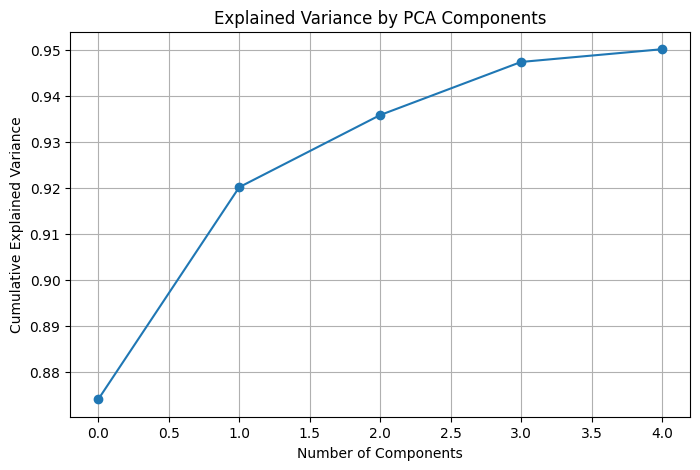

Reduced Data Shape: (388, 5)


In [14]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
df_pca = pca.fit_transform(df_normalized)

# Explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

print(f"Reduced Data Shape: {df_pca.shape}")


In [16]:
print(df_cleaned.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=449)


# Step 8: Model Training

In [18]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_pca  # PCA-reduced features
y = df_cleaned['vomitoxin_ppb']  # Correct target column

# Split data (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (310, 5)
Testing Data Shape: (78, 5)


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 579.4812
Root Mean Squared Error (RMSE): 766.4754
R² Score: 0.0199


# Step 9: Visualizing Model Performance

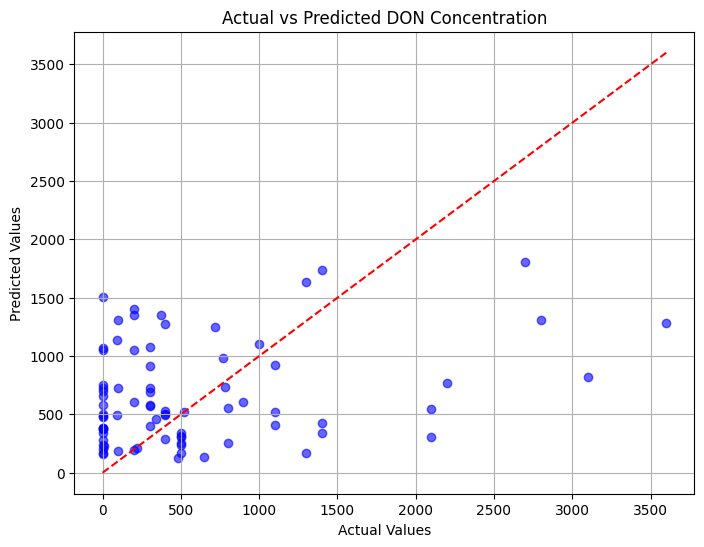

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted DON Concentration')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


# Attention Mechanism

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define Attention Layer
class Attention(nn.Module):
    def __init__(self, input_dim):
        super(Attention, self).__init__()
        self.attn_weights = nn.Parameter(torch.rand(input_dim))
        
    def forward(self, x):
        # Softmax to assign importance scores
        attn_scores = torch.softmax(self.attn_weights, dim=0)
        return x * attn_scores

# Define Model with Attention
class AttentionModel(nn.Module):
    def __init__(self, input_dim):
        super(AttentionModel, self).__init__()
        self.attention = Attention(input_dim)
        self.fc = nn.Linear(input_dim, 1)  # Final prediction layer

    def forward(self, x):
        x = self.attention(x)
        return self.fc(x)

# Data Preparation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)  # Use PCA-reduced data
y = df_cleaned['vomitoxin_ppb'].values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.float32).view(-1, 1), torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Model Training
model = AttentionModel(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
y_pred = model(X_test).detach().numpy()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Epoch [10/50], Loss: 1189906.1250
Epoch [20/50], Loss: 1189889.5000
Epoch [30/50], Loss: 1189872.8750
Epoch [40/50], Loss: 1189856.0000
Epoch [50/50], Loss: 1189839.1250
Mean Absolute Error (MAE): 585.0374
Root Mean Squared Error (RMSE): 970.3471
R² Score: -0.5708
